# Visualization

**Author: Hanh Cao**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

plt.rcParams['figure.figsize'] = (16,8)
BASE_PATH = os.path.join(os.getcwd(), 'IRIData/cleaned_data')

## PART I: Visualization of purchases history

In [2]:
panels_items = pd.read_csv(os.path.join(BASE_PATH, "panels_items_full.csv"), low_memory=False)
panels_items.head()

,PANID,COLUPC,WEEK,total_purchase,month,week,VOL_EQ,PRODUCT TYPE,FLAVOR/SCENT,product_subtype,category,user_info,sugar_level,fat_level,calorie_level,caffeine_level
0,1100032,16343589050,1694,2.0,February,7,0.75,FACIAL TISSUE,NaN,TOP OPENING,FACIAL TISSUE,NaN,NaN,NaN,NaN,NaN
1,1100057,16343589050,1724,1.0,September,37,0.75,FACIAL TISSUE,NaN,TOP OPENING,FACIAL TISSUE,NaN,NaN,NaN,NaN,NaN
2,1105809,16343589050,1706,10.0,May,19,0.75,FACIAL TISSUE,NaN,TOP OPENING,FACIAL TISSUE,NaN,NaN,NaN,NaN,NaN
3,1105809,16343589050,1719,2.0,August,32,0.75,FACIAL TISSUE,NaN,TOP OPENING,FACIAL TISSUE,NaN,NaN,NaN,NaN,NaN
4,1108878,16343589050,1689,2.0,January,2,0.75,FACIAL TISSUE,NaN,TOP OPENING,FACIAL TISSUE,NaN,NaN,NaN,NaN,NaN


### Top most purchase coffee

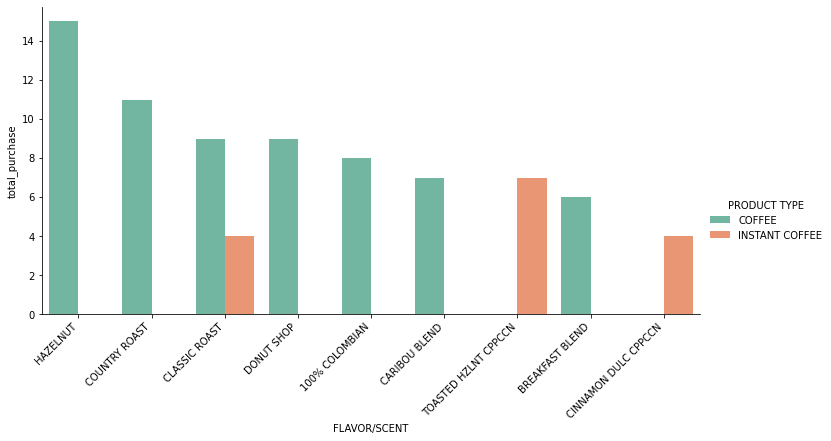

In [3]:
coffee = panels_items.loc[panels_items['category'] == 'COFFEE']
coffee = coffee.groupby(['PRODUCT TYPE', 'FLAVOR/SCENT'])['total_purchase'].sum().reset_index().sort_values('total_purchase', ascending=False)[:10]
g = sns.catplot(x='FLAVOR/SCENT', y='total_purchase', hue='PRODUCT TYPE', 
                    data=coffee, kind='bar', aspect=20/10, palette='Set2')
g.set_xticklabels(rotation=45, horizontalalignment='right')

### Top most purchase Salted Snack

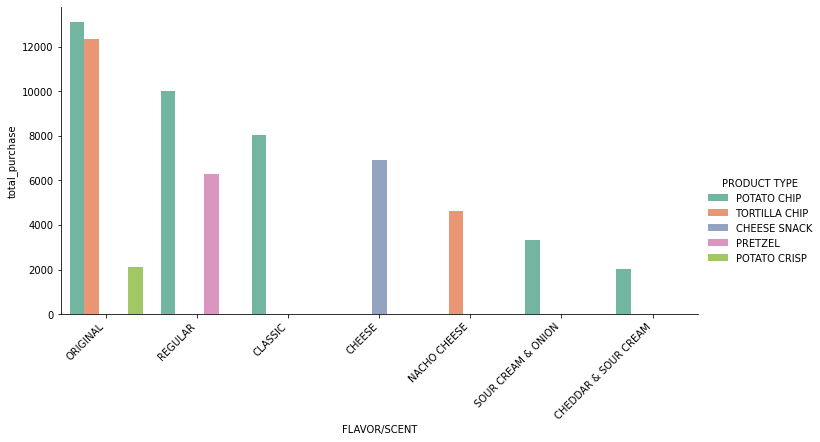

In [4]:
saltsnack = panels_items.loc[panels_items['category'] == 'SALTY SNACKS']
saltsnack = saltsnack.groupby(['PRODUCT TYPE', 'FLAVOR/SCENT'])['total_purchase'].sum().reset_index().sort_values('total_purchase', ascending=False)[:10]
g = sns.catplot(x='FLAVOR/SCENT', y='total_purchase', hue='PRODUCT TYPE', 
                    data=saltsnack, kind='bar', aspect=20/10, palette='Set2')
g.set_xticklabels(rotation=45, horizontalalignment='right')

### Distribution of purchases per month

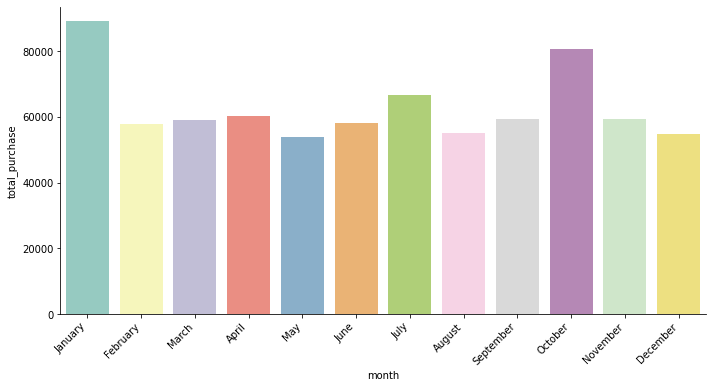

In [5]:
months = panels_items.groupby(['month'])['total_purchase'].sum().reset_index()
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
g = sns.catplot(x='month', y='total_purchase', data=months, kind='bar', order=months_order, aspect=20/10, palette='Set3')
g.set_xticklabels(rotation=45, horizontalalignment='right')

## PART II: Visualization of customers demographics

In [6]:
panels_demos = pd.read_csv(os.path.join(BASE_PATH, "panels_demos.csv"), low_memory=False)
panels_demos.head()

,Panelist ID,Panelist Type,Combined Pre-Tax Income of HH,Family Size,Type of Residential Possession,COUNTY,Age Group Applied to Household Head,Education Level Reached by Household Head,Occupation Code of Household Head,Age Group Applied to Male HH,...,Education Level Reached by Female HH,Occupation Code of Female HH,Female Working Hour Code,FEM_SMOKE,Number of Dogs,Number of Cats,Children Group Code,Marital Status,ZIPCODE,FIPSCODE
0,1100016,5,2,2,1,,6,3,10,7,...,3,10,1,0,0,0,8,2,1201,25003
1,1100032,0,6,2,1,3,5,5,5,7,...,5,5,2,0,0,1,8,4,1201,25003
2,1100057,0,5,1,1,3,6,4,3,7,...,4,3,2,0,1,0,8,2,1201,25003
3,1100180,5,11,2,1,3,5,5,1,5,...,5,1,2,0,1,1,8,1,1201,25003
4,1100198,0,6,1,1,3,6,4,9,6,...,0,11,4,.,0,1,8,2,1201,25003


### Top 5 purchases product items per panels

In [7]:
panels_purchases = panels_items.groupby(['PANID', 'PRODUCT TYPE'])['total_purchase'].sum().reset_index()
top5_per_panels = panels_purchases.assign(rn=panels_purchases.sort_values(['total_purchase'], ascending=False).groupby(['PANID'])
                         .cumcount() + 1).query('rn <= 5').sort_values(['PANID','rn'])
top5_per_panels.drop(['rn'], axis=1, inplace=True)
top5_per_panels.head(10)

,PANID,PRODUCT TYPE,total_purchase
7,1100016,PASTA SAUCE,31.0
12,1100016,SOUP,18.0
9,1100016,PIZZA,6.0
8,1100016,PEANUT BUTTER,5.0
5,1100016,LAUNDRY DETERGENT,4.0
25,1100032,YOGURT,132.0
22,1100032,SOUP,24.0
18,1100032,PASTA SAUCE,19.0
21,1100032,RAMEN NOODLE SOUP MX,10.0
14,1100032,FACIAL TISSUE,10.0


In [8]:
pd.options.display.max_colwidth = 100
top5_items_per_panels = top5_per_panels.groupby('PANID')['PRODUCT TYPE'].apply(list)
top5_items_per_panels.head(10)

PANID
1100016              [PASTA SAUCE, SOUP, PIZZA, PEANUT BUTTER, LAUNDRY DETERGENT]
1100032          [YOGURT, SOUP, PASTA SAUCE, RAMEN NOODLE SOUP MX, FACIAL TISSUE]
1100057             [YOGURT, FACIAL TISSUE, SOUP, POTATO CHIP, LAUNDRY DETERGENT]
1100180               [YOGURT, PIZZA, LAUNDRY DETERGENT, POTATO CHIP, MAYONNAISE]
1100198            [SOUP, PIZZA, FACIAL TISSUE, TOILET BOWL CLEANER, POTATO CHIP]
1100214             [YOGURT, SOUP, POTATO CHIP, FACIAL TISSUE, LAUNDRY DETERGENT]
1100248    [LAUNDRY DETERGENT, MAYONNAISE, POTATO CHIP, YOGURT, SUGAR SUBSTITUTE]
1100503                         [YOGURT, SOUP, BROTH, PASTA SAUCE, FACIAL TISSUE]
1100545            [PASTA SAUCE, POTATO CHIP, PIZZA, FACIAL TISSUE, CHEESE SNACK]
1100560             [YOGURT, POTATO CHIP, SOUP, LAUNDRY DETERGENT, FACIAL TISSUE]
Name: PRODUCT TYPE, dtype: object

In [9]:
panels_combined = pd.merge(top5_items_per_panels, panels_demos, left_on="PANID", right_on="Panelist ID", how="inner")

### Difference in purchase behavior between family with children and single

In [10]:
panels_with_children = panels_combined[~panels_combined['Children Group Code'].isin([0,8])][['Panelist ID', 'PRODUCT TYPE']]
panels_no_children = panels_combined[panels_combined['Children Group Code'].isin([0,8])][['Panelist ID', 'PRODUCT TYPE']]

In [11]:
panels_with_children.head(8)

,Panelist ID,PRODUCT TYPE
10,1100628,"[SOUP, YOGURT, SODA, POTATO CHIP, PASTA SAUCE]"
21,1101519,"[YOGURT, SOUP, PASTA SAUCE, POTATO CHIP, PAPER TOWEL]"
39,1104018,"[PASTA SAUCE, PRETZEL, POTATO CHIP, POTATO SNACK, TORTILLA CHIP]"
80,1108456,"[SOUP, POTATO CHIP, PIZZA, SNACK MIX, YOGURT]"
114,1112268,"[YOGURT, SOUP, PIZZA, PASTA SAUCE, PEANUT BUTTER]"
150,1118356,"[YOGURT, PAPER TOWEL, FACIAL TISSUE, PIZZA, LAUNDRY DETERGENT]"
218,1126375,"[YOGURT, SOUP, PASTA SAUCE, PIZZA, LAUNDRY DETERGENT]"
226,1126797,"[PIZZA, YOGURT, SOUP, POTATO CHIP, PASTA SAUCE]"


In [12]:
panels_no_children.head(8)

,Panelist ID,PRODUCT TYPE
0,1100016,"[PASTA SAUCE, SOUP, PIZZA, PEANUT BUTTER, LAUNDRY DETERGENT]"
1,1100032,"[YOGURT, SOUP, PASTA SAUCE, RAMEN NOODLE SOUP MX, FACIAL TISSUE]"
2,1100057,"[YOGURT, FACIAL TISSUE, SOUP, POTATO CHIP, LAUNDRY DETERGENT]"
3,1100180,"[YOGURT, PIZZA, LAUNDRY DETERGENT, POTATO CHIP, MAYONNAISE]"
4,1100198,"[SOUP, PIZZA, FACIAL TISSUE, TOILET BOWL CLEANER, POTATO CHIP]"
5,1100214,"[YOGURT, SOUP, POTATO CHIP, FACIAL TISSUE, LAUNDRY DETERGENT]"
6,1100248,"[LAUNDRY DETERGENT, MAYONNAISE, POTATO CHIP, YOGURT, SUGAR SUBSTITUTE]"
7,1100503,"[YOGURT, SOUP, BROTH, PASTA SAUCE, FACIAL TISSUE]"


In [13]:
top5_per_panels_tranpose = top5_per_panels.pivot(columns='PRODUCT TYPE', index='PANID', 
                                                 values='total_purchase').reset_index().fillna(0)
top5_per_panels_tranpose.head()

PRODUCT TYPE,PANID,ALMOND YOGURT,AMMONIA,ANTI PERSPIRANT DEOD,ASTSS SALTED SNACKS,BATHROOM TISSUE,BEAN CHIP,BOUILLON,BROTH,BROTH BASE,...,TAHINI,TOILET BOWL CLEANER,TORTILLA CHIP,TOSTADA CHIP,VEGETABLE CHIP,VEGETABLE SNACK,YOGURT,YOGURT DRINK,YOGURT SHAKE,YOGURT SMOOTHIE
0,1100016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1100032,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,132.0,0.0,0.0,0.0
2,1100057,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,212.0,0.0,0.0,0.0
3,1100180,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,74.0,0.0,0.0,0.0
4,1100198,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
top5_per_panels_tranpose.loc[0,"PASTA SAUCE"]

31.0